In [0]:
# Загружаем библиотеки
import numpy as np # работа с векторами
import matplotlib.pyplot as plt # рисовать графики
import pandas as pd # для работы с матрицами
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge



In [2]:
fb = pd.read_csv('https://raw.githubusercontent.com/AVSirotkin/data_for_classes/master/dataset_Facebook.csv', sep = ';')
# переименуем
fb.columns = ['TotalLikes', 'Type', 'Category', 'Month', 'Weekday', 'Hour','Paid', 'Reach', 'Impressions','Engaged',
             'Consumers', 'Consumptions', 'ImpessionsLiked', 'ReachLiked', 'EngagedLiked', 'comment', 'like', 'share', 'total']
fb = fb.dropna()
len(fb)

495

Посмотрим количество лайков в зависимости от того, сколько человек вообще посмотрели этот пост

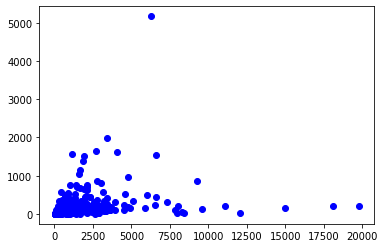

In [16]:
plt.scatter(fb['Consumptions'], fb['like'],color = 'blue')

In [0]:
y = fb['like'].values
y = y.reshape(-1,1)

In [0]:
X = fb.iloc[:, 6:16]
#X = X.reshape(-1,1)

In [0]:
# Разделим данные на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 4)

In [6]:
regFB = LinearRegression()
regFB.fit(X_train,y_train)
regFB.intercept_, regFB.coef_

(array([13.09449718]),
 array([[-2.58980564e+00, -7.60618542e-04,  1.95747564e-04,
          1.10696713e+00, -1.10026700e+00,  3.36084721e-03,
          2.28242094e-05,  4.82002607e-04,  1.38396951e-02,
          1.75334144e+00]]))

In [7]:
regR = Ridge(alpha = 1)
regR.fit(X_train,y_train)
regR.intercept_, regR.coef_

(array([13.08664277]),
 array([[-2.55561763e+00, -7.60580623e-04,  1.95722142e-04,
          1.10696462e+00, -1.10026709e+00,  3.36121368e-03,
          2.28804898e-05,  4.81675872e-04,  1.38437280e-02,
          1.75331949e+00]]))

Text(0, 0.5, 'Реальные значения')

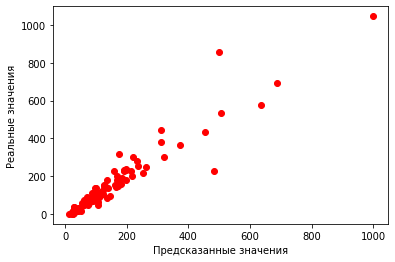

In [8]:
y_pred = regFB.predict(X_test)
plt.scatter(y_pred,y_test,color = 'red')
plt.xlabel('Предсказанные значения')
plt.ylabel("Реальные значения")

In [9]:
#MSE
mse = np.mean((y_pred - y_test)**2)
mse

3038.6272976636355

Text(0, 0.5, 'Реальные значения')

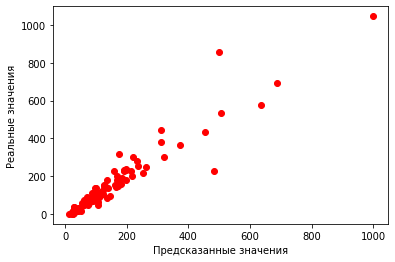

In [10]:
y_pred_l = regR.predict(X_test)
plt.scatter(y_pred_l,y_test,color = 'red')
plt.xlabel('Предсказанные значения')
plt.ylabel("Реальные значения")

In [11]:
mse = np.mean((y_pred_l - y_test)**2)
mse

3038.517410699668

Ридж регрессия показала небольшой прирост качества по сравнению с простой регрессией.
Ваша задача:
1. Попробуйте изменить параметр alpha и посмотрите, на что он влияет.
2. Посмотрите справку по RidgeCV и попробуйте подобрать с ее помощью оптимальное значение alpha.